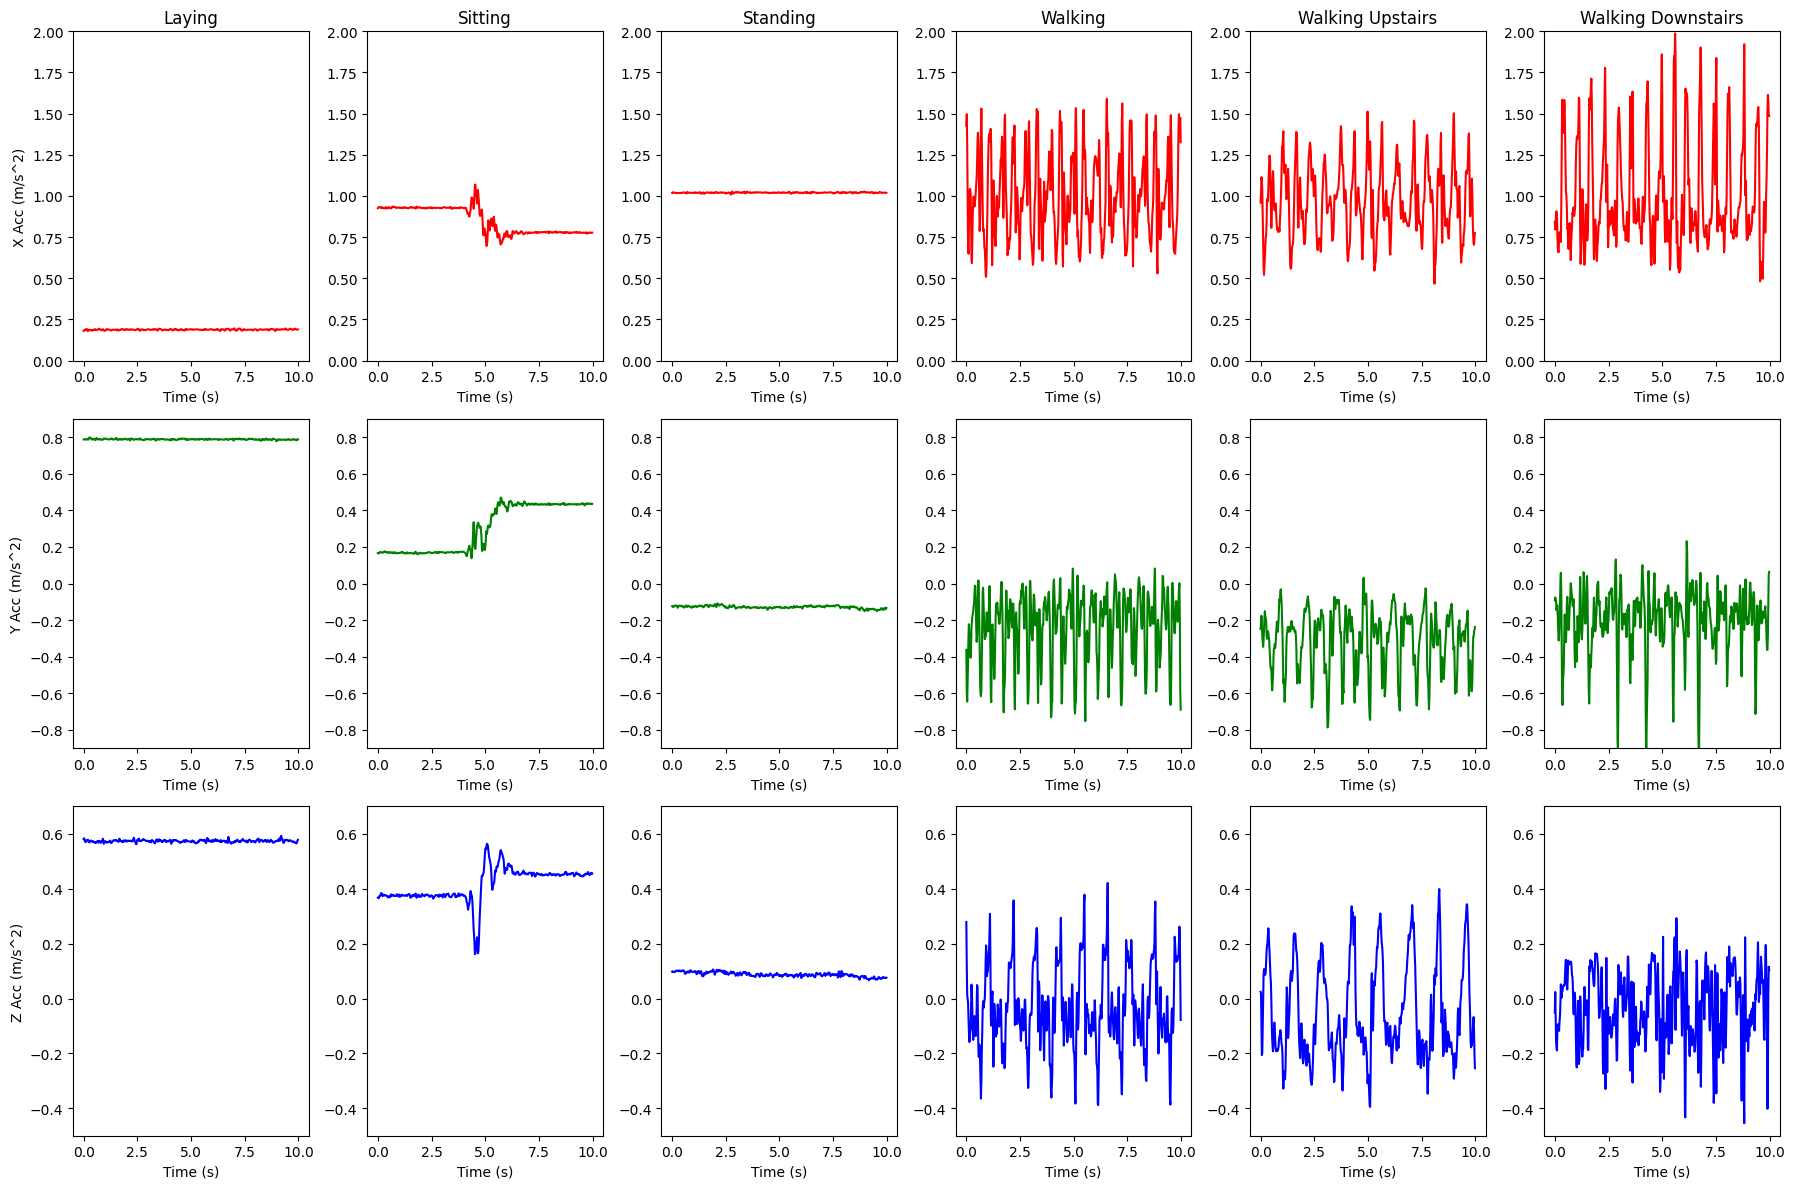

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 12))

for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)
    
    x_acc = data['accx'][:500]
    y_acc = data['accy'][:500]
    z_acc = data['accz'][:500]
    
    time = [i/50 for i in range(500)]
    
    plt.subplot(3, 6, i + 1)
    plt.plot(time, x_acc, color='r')
    plt.ylim(0,2)
    plt.title(activities[i])
    if i == 0:
        plt.ylabel('X Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    plt.subplot(3, 6, i + 7)
    plt.plot(time, y_acc, color='g')
    plt.ylim(-0.9,0.9)
    if i == 0:
        plt.ylabel('Y Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    plt.subplot(3, 6, i + 13)
    plt.plot(time, z_acc, color='b')
    plt.ylim(-0.5,0.7)
    if i == 0:
        plt.ylabel('Z Acc (m/s^2)')
    plt.xlabel('Time (s)')

plt.tight_layout()

plt.show()


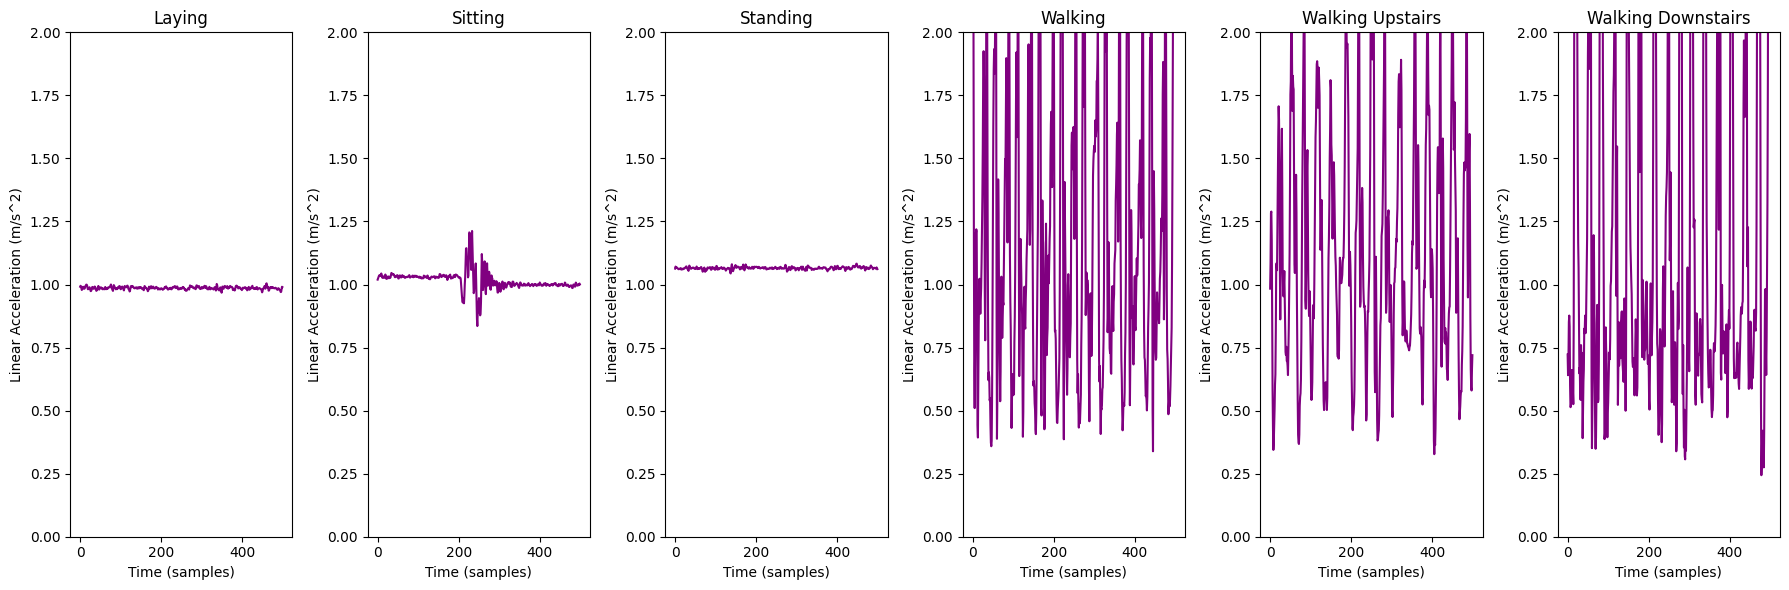

In [10]:
import numpy as np


files = [
    r'Combined/Train/LAYING/Subject_1.csv',
    r'Combined/Train/SITTING/Subject_1.csv',
    r'Combined/Train/STANDING/Subject_1.csv',
    r'Combined/Train/WALKING/Subject_1.csv',
    r'Combined/Train/WALKING_UPSTAIRS/Subject_1.csv',
    r'Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 6))


for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)

    linear_acc = data['accx']**2 + data['accy']**2 + data['accz']**2

    plt.subplot(1, 6, i + 1)
    plt.plot(linear_acc[:500], color='purple')
    plt.title(activities[i])
    plt.ylim(0, 2)
    plt.xlabel('Time (samples)')
    plt.ylabel('Linear Acceleration (m/s^2)')
    
plt.tight_layout()
plt.show()

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


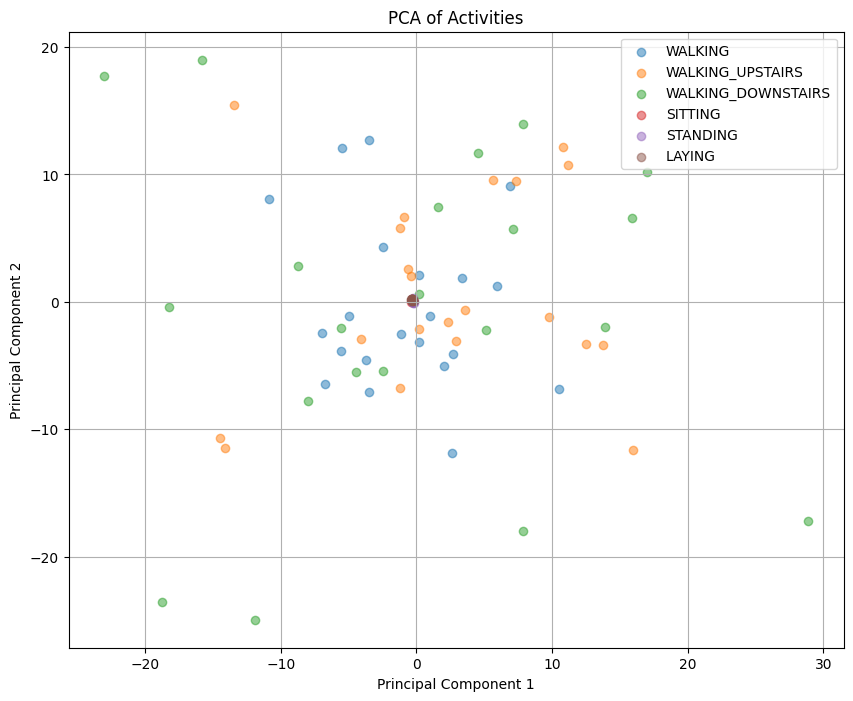

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from MakeDataset import X_train, y_train, classes

total_acceleration = np.sum(X_train**2, axis=2)

X_train_2D = total_acceleration.reshape(total_acceleration.shape[0], -1)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_2D)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scale)

labels = {v: k for k, v in classes.items()}

plt.figure(figsize=(10, 8))

activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from MakeDataset import X_train, y_train, classes

# Step 1: Reshape the data into the shape required by TSFEL (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_train.shape

# Reshape data into 2D array for TSFEL (combine features and timesteps)
X_train_reshaped = X_train.reshape(n_samples, n_timesteps * n_features)

# Step 2: Create a custom feature configuration to select only relevant features
cfg = tsfel.get_features_by_domain()  # Start with the full feature set

# Customize the feature configuration by enabling only specific features
# Example: Enabling only temporal features (mean, standard deviation, etc.)
for domain in cfg:
    if domain != 'temporal':  # Only keep temporal features
        cfg[domain] = {}

# Step 3: Extract the selected features using TSFEL
X_train_tsfel = pd.DataFrame()

for i in range(n_samples):
    tsfel_features = tsfel.time_series_features_extractor(cfg, X_train_reshaped[i, :].reshape(n_timesteps, n_features))
    X_train_tsfel = pd.concat([X_train_tsfel, tsfel_features], axis=0, ignore_index=True)

# Step 4: Standardize the feature data
scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel)

# Step 5: Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tsfel_scaled)

# Step 6: Plot the scatter plot
labels = {v: k for k, v in classes.items()}
activities = np.unique(y_train)
colours = plt.get_cmap('tab10').colors

plt.figure(figsize=(10, 8))

for i, activity in enumerate(activities):
    plt.scatter(X_train_pca[y_train == activity, 0], X_train_pca[y_train == activity, 1],
                color=colours[i], label=labels[activity], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities with Selected TSFEL Features')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'tsfel'

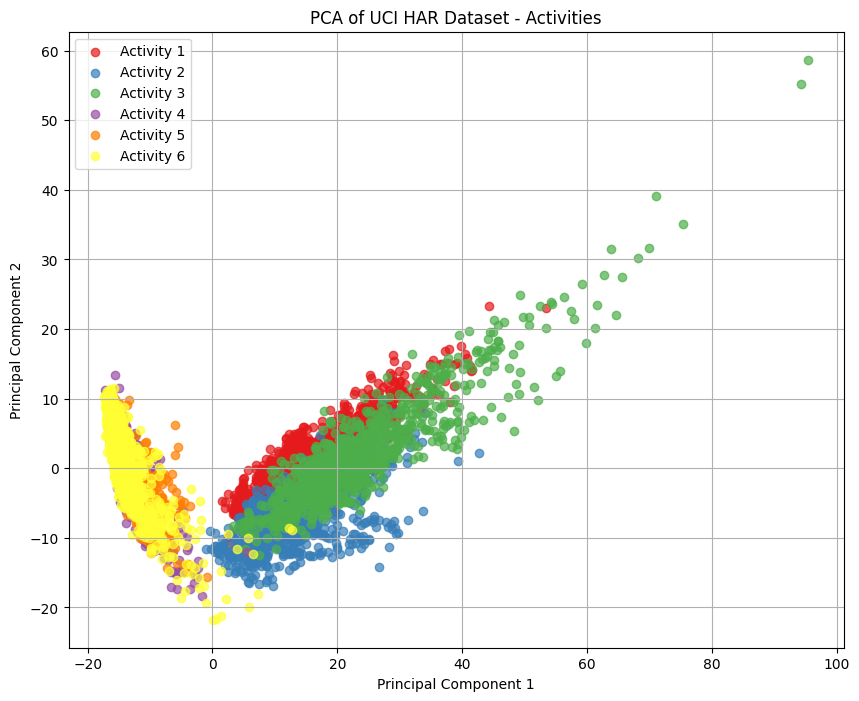

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# File paths
xtrain_path = r'UCI HAR Dataset/train/X_train.txt'
ytrain_path = r'UCI HAR Dataset/train/y_train.txt'

# Load the features and labels
xtrain = np.loadtxt(xtrain_path)
ytrain = np.loadtxt(ytrain_path, dtype=int)

# Preprocessing: Standardize the data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

# Apply PCA to reduce from 561 features to 2D
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for each activity class with more vibrant and contrasting colors
activities = np.unique(ytrain)
colormap = plt.colormaps.get_cmap('Set1')  # Use a vibrant colormap
colors = [colormap(i) for i in range(len(activities))]

for i, activity in enumerate(activities):
    plt.scatter(xtrain_pca[ytrain == activity, 0], xtrain_pca[ytrain == activity, 1],
                    color=colors[i], label=f'Activity {activity}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of UCI HAR Dataset - Activities')
plt.legend()
plt.grid(True)
plt.show()